In [1]:
#Import lib
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from my_useful_functions import calculate_performance,calculate_performance_SP
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from compute_abroca import *
from compute_abroca_diabetes import *
import numpy as np
import sklearn.metrics as metrics 
from scipy import interpolate
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib
import numpy
from mutar import GroupLasso
from mutar import IndLasso
from mutar import GroupLasso_Sparse
#matplotlib.use('TkAgg')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:




def load_german():
    df = pd.read_csv('data/german_data_credit.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'class-label'
    filename = "german.abroca.pdf"
    df['class-label'] = [1 if v == 1 else 0 for v in df['class-label']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [3]:
def load_crime():
    df = pd.read_csv('data/communities_crime.csv')    
    protected_attribute = 'Black'
    majority_group_name = "Non-Black"
    minority_group_name = "Black"
    class_label = 'class'
    filename = "crime.abroca.pdf"
    #df['class'] = [1 if v == 1 else 0 for v in df['y']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [4]:
def load_compas_recid():
    df = pd.read_csv('data/compas-scores-two-years_clean.csv')    
    protected_attribute = 'race'
    majority_group_name = "White"
    minority_group_name = "Black"
    class_label = 'two_year_recid'
    filename = "compas.recid.abroca.pdf"
    #Remove all row without black and white
    df = df[(df['race']=='African-American') | (df['race'] == "Caucasian")]
    df['race'] = ['Black' if v == 'African-American' else "White" for v in df['race']]
    new_columns = ["age_cat", "race", "sex", "priors_count", "c_charge_degree","score_text","v_score_text","two_year_recid"]
    df = df[new_columns]
    df['two_year_recid'] = [1 if v == 1 else 0 for v in df['two_year_recid']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [5]:
def load_dutch():
    df = pd.read_csv('data/dutch.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'occupation'
    filename = "dutch.abroca.pdf"    
    df['sex']=['Male' if v == 'male' else 'Female' for v in df['sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name



In [6]:
def load_oulad():
    df = pd.read_csv('data/oulad_clean.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'final_result'
    filename = "oulad.abroca.pdf"    
    
    #Label gender
    df['gender']=['Male' if v == 'M' else 'Female' for v in df['gender']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [7]:
def load_bank():
    df = pd.read_csv('data/bank-full.csv')    
    protected_attribute = 'marital'
    majority_group_name = "Married"
    minority_group_name = "Non-Married"
    class_label = 'y'
    filename = "bank.abroca.pdf"
    df['y'] = [1 if v == 'yes' else 0 for v in df['y']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [8]:
def load_kdd():
    df = pd.read_csv('data/kdd-census-income-clean.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'income'
    filename = "kdd.abroca.pdf"
    df['income'] = [1 if v == ">50K" else 0 for v in df['income']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [9]:
def load_adult():
    df = pd.read_csv('data/adult-clean.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'Class-label'
    filename = "adult.abroca.pdf"
    df['Class-label'] = [1 if v == 1 else 0 for v in df['Class-label']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [10]:
def load_compas_viol():
    df = pd.read_csv('data/compas-scores-two-years-violent_clean.csv')    
    protected_attribute = 'race'
    majority_group_name = "White"
    minority_group_name = "Black"
    class_label = 'two_year_recid'
    filename = "compas.viol.abroca.pdf"
    #Remove all row without black and white
    df = df[(df['race']=='African-American') | (df['race'] == "Caucasian")]
    df['race'] = ['Black' if v == 'African-American' else "White" for v in df['race']]
    new_columns = ["age_cat", "race", "sex", "priors_count", "c_charge_degree","score_text","v_score_text","two_year_recid"]
    df = df[new_columns]    
    #df["score_text"] = ['Low' if v =='Low' else 'Medium' if v=='Medium' else 'High' for v in df['score_text']]
    df["score_text"] = df["score_text"].astype('str')        
    df["v_score_text"] = df["v_score_text"].astype('object')
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:        
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [11]:
def load_credit():
    df = pd.read_csv('data/credit-card-clients.csv')    
    protected_attribute = 'SEX'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'readmitted'
    filename = "credit.abroca.pdf"
    
    df['SEX'] = ['Male' if v == 1 else 'Female' for v in df['SEX']]
    
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [12]:
def load_law():
    df = pd.read_csv('data/law_school_clean.csv')    
    protected_attribute = 'race'
    majority_group_name = "White"
    minority_group_name = "Non-White"
    class_label = 'occupation'
    filename = "law.abroca.pdf"    
    
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [13]:
def load_ricci():
    df = pd.read_csv('data/ricci_race.csv')    
    protected_attribute = 'Race'
    majority_group_name = "White"
    minority_group_name = "Non-White"
    class_label = 'Promoted'
    filename = "ricci.abroca.pdf"    
    
    #Label promoted
    df['Promoted']=[1 if v == 1 else 0 for v in df['Promoted']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [14]:
def load_student_mat():
    df = pd.read_csv('data/student_mat_new.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'class'
    filename = "student-mat.abroca.pdf"    
    
    #Label class
    df['class']=[1 if v == "High" else 0 for v in df['class']]
    #Label sex
    df['sex']=["Female" if v == "F" else "Male" for v in df['sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [15]:
def load_student_por():
    df = pd.read_csv('data/student_por_new.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'class'
    filename = "student-por.abroca.pdf"    
    
    #Label class
    df['class']=[1 if v == "High" else 0 for v in df['class']]
    #Label sex
    df['sex']=["Female" if v == "F" else "Male" for v in df['sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [16]:
def load_diabetes():
    df = pd.read_csv('data/diabetes-clean.csv')    
    protected_attribute = 'race'
    majority_group_name = "Caucasian"
    minority_group_name = "Non Caucasian"
    class_label = 'default payment'
    filename = "diabetes.abroca.pdf"
    df['race'] = ['Caucasian' if v == 'Caucasian' else "Non Caucasian" for v in df['race']]
    #df['y'] = [1 if v == 'yes' else 0 for v in df['y']]
    df['readmitted'] = [1 if v == '<30' else 0 for v in df['readmitted']]    
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,2:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [17]:
def load_adult_reconstruction():
    df = pd.read_csv('data/adult-reconstruction-clean.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'income_bin'
    filename = "adult_new.abroca.pdf"
    df['income_bin'] = [1 if v == ">50K" else 0 for v in df['income_bin']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [18]:
def run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name):    
      
    #Run Logistic Regression model
    #LR = LogisticRegression(random_state=0)
    #LR = Lasso(random_state=0,alpha=0.1)
    train_major_index=[]
    train_minor_index=[]
    test_major_index=[]
    test_minor_index=[]
    #y_df_train=pd.concat([y_train, y_train], axis=1)
    #clf = MultiOutputClassifier(LogisticRegression()).fit(X_train, y_df_train)
    #LR.fit(X_train,y_df_train)
    #print(y_df_train)
    #Run Logistic Regression model
    for idx, val in enumerate(X_train.values): 
        if val[sa_index]==p_Group:
            train_minor_index.append(idx)
        else:
            train_major_index.append(idx)
    for idx, val in enumerate(X_test.values): 
        if val[sa_index]==p_Group:
            test_minor_index.append(idx)
        else:
            test_major_index.append(idx)    
    X_train_major=X_train.iloc[train_major_index,:]
    y_train_major=y_train.iloc[train_major_index]
    X_train_minor=X_train.iloc[train_minor_index,:]
    y_train_minor=y_train.iloc[train_minor_index]
    X_test_major=X_test.iloc[test_major_index,:]
    y_test_major=y_test.iloc[test_major_index]
    X_test_minor=X_test.iloc[test_minor_index,:]
    y_test_minor=y_test.iloc[test_minor_index]
    #max_size_train=min(X_train_minor.shape[0],X_train_major.shape[0])
    print(X_train_major.shape,X_train_minor.shape)
    X_train_=numpy.concatenate([X_train_major, X_train_minor], axis=0)
    y_train_=numpy.concatenate([y_train_major, y_train_minor], axis=0)
    print(X_train_.shape)
    X_train_=X_train_.astype('float64')
    y_train_=y_train_.astype('float64')
    
    
    LR=LinearRegression()
    coef=LR.fit(X_train_,y_train_).coef_
    y_pred_probs = LR.predict(X_test)
    y_predicts=(y_pred_probs*2).astype(int)
    #y_pred_probs = LR.predict_proba(X_test)
    print(coef)    
    #Print measures
    print("Equalized odds")
    print(calculate_performance(X_test.values, y_test.values, y_predicts, y_pred_probs, sa_index, p_Group))
    
    #
    print("Statistical parity")
    print(calculate_performance_SP(X_test.values, y_test.values, y_predicts, sa_index, p_Group))
    
    #make predictions
    #X_test['pred_proba'] = LR.predict_proba(X_test)[:,1:2]
    X_test['pred_proba'] = LR.predict(X_test)
    X_test['true_label'] = y_test
    df_test = X_test
    
    #Compute Abroca
    slice = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'true_label', protected_attr_col = protected_attribute,
                           majority_protected_attr_val = 1, n_grid = 10000,
                           plot_slices = True, majority_group_name=majority_group_name ,minority_group_name=minority_group_name,file_name = filename)
    print("ABROCA:",slice)
    
    
    
def run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name):    
    train_major_index=[]
    train_minor_index=[]
    test_major_index=[]
    test_minor_index=[]
    #y_df_train=pd.concat([y_train, y_train], axis=1)
    #clf = MultiOutputClassifier(LogisticRegression()).fit(X_train, y_df_train)
    #LR.fit(X_train,y_df_train)
    #print(y_df_train)
    #Run Logistic Regression model
    for idx, val in enumerate(X_train.values): 
        if val[sa_index]==p_Group:
            train_minor_index.append(idx)
        else:
            train_major_index.append(idx)
    for idx, val in enumerate(X_test.values): 
        if val[sa_index]==p_Group:
            test_minor_index.append(idx)
        else:
            test_major_index.append(idx)    
    X_train_major=X_train.iloc[train_major_index,:]
    y_train_major=y_train.iloc[train_major_index]
    X_train_minor=X_train.iloc[train_minor_index,:]
    y_train_minor=y_train.iloc[train_minor_index]
    X_test_major=X_test.iloc[test_major_index,:]
    y_test_major=y_test.iloc[test_major_index]
    X_test_minor=X_test.iloc[test_minor_index,:]
    y_test_minor=y_test.iloc[test_minor_index]
    n_samples_list=[X_train_minor.shape[0],X_train_major.shape[0]]
    max_size_train=max(n_samples_list)
    print(X_train_major.shape,X_train_minor.shape)
    if X_train_minor.shape[0]==max_size_train:
        X_padding=numpy.zeros((X_train_minor.shape[0]-X_train_major.shape[0],X_train_minor.shape[1]))
        X_train_major=numpy.concatenate([X_train_major,X_padding], axis=0)
        y_padding=numpy.zeros(y_train_minor.shape[0]-y_train_major.shape[0])
        y_train_major=numpy.concatenate([y_train_major,y_padding],axis=0)
    else:
        X_padding=numpy.zeros((X_train_major.shape[0]-X_train_minor.shape[0],X_train_minor.shape[1]))
        X_train_minor=numpy.concatenate([X_train_minor,X_padding], axis=0)
        y_padding=numpy.zeros(y_train_major.shape[0]-y_train_minor.shape[0])
        y_train_minor=numpy.concatenate([y_train_minor,y_padding],axis=0)
    X_train_major=numpy.expand_dims(X_train_major,axis=0)
    y_train_major=numpy.expand_dims(y_train_major,axis=0)
    X_train_minor=numpy.expand_dims(X_train_minor,axis=0)
    y_train_minor=numpy.expand_dims(y_train_minor,axis=0)
    print(X_train_major.shape,X_train_minor.shape)
    X_train_=numpy.concatenate([X_train_major, X_train_minor], axis=0)
    y_train_=numpy.concatenate([y_train_major, y_train_minor], axis=0)
    X_train_=X_train_.astype('float64')
    y_train_=y_train_.astype('float64')
    #print(X_train_.shape,y_train_.shape)
    gl = GroupLasso(alpha=0.01)
    #alpha=[0.01,0.01]
    
    #gl = IndRewLogisticL1(alpha=alpha)
    #gl = IndLasso(alpha=alpha)
    #print(X_train_.shape, y_train_.shape)
    coef = gl._fit(X_train_, y_train_,n_samples_list).coef_
    print(coef)
    print(sum(np.abs(np.sign(coef))))
    max_size_test=min(X_test_minor.shape[0],X_test_major.shape[0])

    X_test_major_=numpy.expand_dims(X_test_major[:max_size_test],axis=0)
    y_test_major_=numpy.expand_dims(y_test_major[:max_size_test],axis=0)
    X_test_minor_=numpy.expand_dims(X_test_minor[:max_size_test],axis=0)
    y_test_minor_=numpy.expand_dims(y_test_minor[:max_size_test],axis=0)
    X_test_major=X_test_major[:max_size_test]
    y_test_major=y_test_major[:max_size_test]
    X_test_minor=X_test_minor[:max_size_test]
    y_test_minor=y_test_minor[:max_size_test]
    X_test_=numpy.concatenate([X_test_major_, X_test_minor_], axis=0)
    y_test_=numpy.concatenate([y_test_major_, y_test_minor_], axis=0)
    X_test_=X_test_.astype('float64')
    y_test_=y_test_.astype('float64')
    X_test=numpy.concatenate([X_test_major, X_test_minor], axis=0)
    y_test=numpy.concatenate([y_test_major, y_test_minor], axis=0)
    
    #y_predicts = gl.predict(X_test_)

    y_pred_probs_ = gl.predict(X_test_)
    y_predicts_=np.round(y_pred_probs_)   
    #Print measures

    y_predicts=numpy.concatenate((y_predicts_[0], y_predicts_[1]), axis=0)
    y_pred_probs=numpy.concatenate((y_pred_probs_[0], y_pred_probs_[1]), axis=0)
    print(y_pred_probs_.shape)
    print("Equalized odds")
    print(calculate_performance(X_test, y_test, y_predicts, y_pred_probs, sa_index, p_Group))
    #
    print("Statistical parity")
    print(calculate_performance_SP(X_test, y_test, y_predicts, sa_index, p_Group))
    print(gl.predict(X_test_major_).shape,gl.predict(X_test_minor_).shape)    
    #make predictions
    X_test_major['pred_proba'] = gl.predict(X_test_)[0,:]
    X_test_major['true_label'] = y_test_major
    X_test_minor['pred_proba'] = gl.predict(X_test_)[1,:]
    X_test_minor['true_label'] = y_test_minor
    
    df_test=pd.concat([X_test_major, X_test_minor], axis=0)
    #Compute Abroca
    slice = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'true_label', protected_attr_col = protected_attribute,
                           majority_protected_attr_val = 1, n_grid = 10000,
                           plot_slices = True, majority_group_name=majority_group_name ,minority_group_name=minority_group_name,file_name = filename)
    print("ABROCA:",slice)
    

    
    
def run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name):    
    train_major_index=[]
    train_minor_index=[]
    test_major_index=[]
    test_minor_index=[]
    #y_df_train=pd.concat([y_train, y_train], axis=1)
    #clf = MultiOutputClassifier(LogisticRegression()).fit(X_train, y_df_train)
    #LR.fit(X_train,y_df_train)
    #print(y_df_train)
    #Run Logistic Regression model
    for idx, val in enumerate(X_train.values): 
        if val[sa_index]==p_Group:
            train_minor_index.append(idx)
        else:
            train_major_index.append(idx)
    for idx, val in enumerate(X_test.values): 
        if val[sa_index]==p_Group:
            test_minor_index.append(idx)
        else:
            test_major_index.append(idx)    
    X_train_major=X_train.iloc[train_major_index,:]
    y_train_major=y_train.iloc[train_major_index]
    X_train_minor=X_train.iloc[train_minor_index,:]
    y_train_minor=y_train.iloc[train_minor_index]
    X_test_major=X_test.iloc[test_major_index,:]
    y_test_major=y_test.iloc[test_major_index]
    X_test_minor=X_test.iloc[test_minor_index,:]
    y_test_minor=y_test.iloc[test_minor_index]
    n_samples_list=[X_train_minor.shape[0],X_train_major.shape[0]]
    max_size_train=max(n_samples_list)
    print(X_train_major.shape,X_train_minor.shape)
    if X_train_minor.shape[0]==max_size_train:
        X_padding=numpy.zeros((X_train_minor.shape[0]-X_train_major.shape[0],X_train_minor.shape[1]))
        X_train_major=numpy.concatenate([X_train_major,X_padding], axis=0)
        y_padding=numpy.zeros(y_train_minor.shape[0]-y_train_major.shape[0])
        y_train_major=numpy.concatenate([y_train_major,y_padding],axis=0)
    else:
        X_padding=numpy.zeros((X_train_major.shape[0]-X_train_minor.shape[0],X_train_minor.shape[1]))
        X_train_minor=numpy.concatenate([X_train_minor,X_padding], axis=0)
        y_padding=numpy.zeros(y_train_major.shape[0]-y_train_minor.shape[0])
        y_train_minor=numpy.concatenate([y_train_minor,y_padding],axis=0)
    X_train_major=numpy.expand_dims(X_train_major,axis=0)
    y_train_major=numpy.expand_dims(y_train_major,axis=0)
    X_train_minor=numpy.expand_dims(X_train_minor,axis=0)
    y_train_minor=numpy.expand_dims(y_train_minor,axis=0)
    print(X_train_major.shape,X_train_minor.shape)
    X_train_=numpy.concatenate([X_train_major, X_train_minor], axis=0)
    y_train_=numpy.concatenate([y_train_major, y_train_minor], axis=0)
    X_train_=X_train_.astype('float64')
    y_train_=y_train_.astype('float64')
    #print(X_train_.shape,y_train_.shape)
    gl = GroupLasso_Sparse(alpha=0.01)
    #alpha=[0.01,0.01]
    
    #gl = IndRewLogisticL1(alpha=alpha)
    #gl = IndLasso(alpha=alpha)
    #print(X_train_.shape, y_train_.shape)
    coef = gl._fit(X_train_, y_train_,n_samples_list).coef_
    print(coef)
    print(sum(np.abs(np.sign(coef))))
    max_size_test=min(X_test_minor.shape[0],X_test_major.shape[0])

    X_test_major_=numpy.expand_dims(X_test_major[:max_size_test],axis=0)
    y_test_major_=numpy.expand_dims(y_test_major[:max_size_test],axis=0)
    X_test_minor_=numpy.expand_dims(X_test_minor[:max_size_test],axis=0)
    y_test_minor_=numpy.expand_dims(y_test_minor[:max_size_test],axis=0)
    X_test_major=X_test_major[:max_size_test]
    y_test_major=y_test_major[:max_size_test]
    X_test_minor=X_test_minor[:max_size_test]
    y_test_minor=y_test_minor[:max_size_test]
    X_test_=numpy.concatenate([X_test_major_, X_test_minor_], axis=0)
    y_test_=numpy.concatenate([y_test_major_, y_test_minor_], axis=0)
    X_test_=X_test_.astype('float64')
    y_test_=y_test_.astype('float64')
    X_test=numpy.concatenate([X_test_major, X_test_minor], axis=0)
    y_test=numpy.concatenate([y_test_major, y_test_minor], axis=0)
    
    #y_predicts = gl.predict(X_test_)

    y_pred_probs_ = gl.predict(X_test_)
    y_predicts_=np.round(y_pred_probs_)   
    #Print measures

    y_predicts=numpy.concatenate((y_predicts_[0], y_predicts_[1]), axis=0)
    y_pred_probs=numpy.concatenate((y_pred_probs_[0], y_pred_probs_[1]), axis=0)
    print(y_pred_probs_.shape)
    print("Equalized odds")
    print(calculate_performance(X_test, y_test, y_predicts, y_pred_probs, sa_index, p_Group))
    #
    print("Statistical parity")
    print(calculate_performance_SP(X_test, y_test, y_predicts, sa_index, p_Group))
    print(gl.predict(X_test_major_).shape,gl.predict(X_test_minor_).shape)    
    #make predictions
    X_test_major['pred_proba'] = gl.predict(X_test_)[0,:]
    X_test_major['true_label'] = y_test_major
    X_test_minor['pred_proba'] = gl.predict(X_test_)[1,:]
    X_test_minor['true_label'] = y_test_minor
    
    df_test=pd.concat([X_test_major, X_test_minor], axis=0)
    #Compute Abroca
    slice = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'true_label', protected_attr_col = protected_attribute,
                           majority_protected_attr_val = 1, n_grid = 10000,
                           plot_slices = True, majority_group_name=majority_group_name ,minority_group_name=minority_group_name,file_name = filename)
    print("ABROCA:",slice)

In [19]:
#Main function
def run_eval(dataset):
    if dataset == 'adult-gender':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_adult()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_adult()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_adult()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'kdd':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_kdd()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_kdd()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_kdd()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'german':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_german()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_german()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_german()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'bank':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_bank()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_bank()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_bank()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'crime':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_crime()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_crime()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_crime()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'compas-recid':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_compas_recid()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_compas_recid()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_compas_recid()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'compas-viol':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_compas_viol()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_compas_viol()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_compas_viol()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'credit':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_credit()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_credit()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_credit()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'diabetes':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_diabetes()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_diabetes()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_diabetes()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'dutch':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_dutch()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_dutch()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_dutch()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'law':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_law()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_law()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_law()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'oulad':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_oulad()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_oulad()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_oulad()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'ricci':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_ricci()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_ricci()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_ricci()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'student-mat':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_mat()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_mat()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_mat()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'student-por':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_por()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_por()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_por()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
    if dataset == 'adult-reconstruction':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_adult_reconstruction()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_adult_reconstruction()
        run_experiment_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                                
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_adult_reconstruction()
        run_experiment_group_lasso(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                                

(478, 21) (222, 21)
(700, 21)
[ 8.29740043e-02 -3.36627423e-03 -4.19899660e-02  2.07874455e-02
 -1.96744769e-05  1.96837953e-02 -4.64870975e-05 -5.60354384e-02
 -1.03428218e-02 -8.38618514e-03 -3.65267081e-02  4.23990025e-03
  4.23355705e-02 -3.07005461e-03 -1.66904930e-02  9.12028580e-03
 -4.82191764e-02  7.00567750e-02 -1.47837994e-01  9.39104552e-02
 -5.75588965e-02]
Equalized odds
{'balanced_accuracy': 0.5741889689258111, 'accuracy': 0.6833333333333333, 'fairness': 0.23344921852906242, 'TPR_protected': 0.9322033898305084, 'TPR_non_protected': 0.82, 'TNR_protected': 0.3793103448275862, 'TNR_non_protected': 0.25806451612903225}
Statistical parity
{'balanced_accuracy': 0.5741889689258111, 'accuracy': 0.6833333333333333, 'fairness': -0.03237564322469988, 'Positive_prot_pred': 0.8295454545454546, 'Positive_non_prot_pred': 0.7971698113207547, 'Negative_prot_pred': 0.17045454545454544, 'Negative_non_prot_pred': 0.2028301886792453}


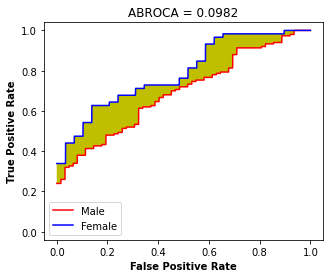

ABROCA: 0.09821035602862602
(478, 21) (222, 21)
(1, 478, 21) (1, 478, 21)
[[ 5.31015524e-02  9.40450520e-02]
 [ 1.68099690e-03 -3.10380554e-03]
 [-9.60101541e-03  1.24408352e-03]
 [ 2.59568804e-02  3.16109592e-02]
 [-8.32926005e-06 -1.65940163e-05]
 [ 4.84499430e-03  4.82457292e-02]
 [-3.35162062e-03 -1.02237808e-02]
 [ 1.61813375e-02 -5.64801941e-02]
 [ 1.41532185e-02  3.89952753e-02]
 [ 2.80361991e-03 -2.05896096e-03]
 [-1.24990695e-02 -1.24044574e-03]
 [ 9.27976939e-03  9.16561421e-03]
 [ 8.36946048e-03  5.69856309e-02]
 [ 1.02148941e-01  5.67540329e-02]
 [-1.04767025e-02  2.86632354e-02]
 [ 3.28712521e-02  1.92475681e-02]
 [ 0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]]
[16. 16.]
(2, 88)
Equalized odds
{'balanced_accuracy': 0.5768595041322314, 'accuracy': 0.7045454545454546, 'fairness': 0.30648786932605104, 'TPR_protected': 0.9152542372881356, 'TPR_non_prot

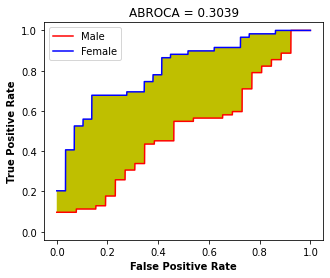

ABROCA: 0.30387530542365915
(478, 21) (222, 21)
(1, 478, 21) (1, 478, 21)
[[ 4.97588560e-02  9.01579307e-02]
 [ 6.34656642e-04 -3.07367402e-03]
 [-3.22604776e-02 -0.00000000e+00]
 [ 2.17617197e-02  3.13554672e-02]
 [-1.13277510e-05 -2.13587760e-05]
 [-0.00000000e+00  5.32656119e-02]
 [-5.16324450e-03 -1.66627839e-02]
 [-0.00000000e+00 -7.09843304e-02]
 [-0.00000000e+00  5.69410012e-02]
 [ 0.00000000e+00 -6.26631970e-03]
 [-3.12246578e-02 -0.00000000e+00]
 [ 7.69705108e-03  9.28552389e-03]
 [-0.00000000e+00  1.01019923e-01]
 [ 6.77716683e-02  4.09511854e-02]
 [-3.92976584e-02  4.77685794e-02]
 [ 2.68017245e-02  1.20971060e-02]
 [ 0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  6.94401081e-03]
 [-0.00000000e+00  0.00000000e+00]
 [ 3.76473666e-01  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]]
[12. 15.]
(2, 88)
Equalized odds
{'balanced_accuracy': 0.5768595041322314, 'accuracy': 0.7045454545454546, 'fairness': 0.30648786932605104, 'TPR_protected': 0.9152542372881356, 'TPR_non_prot

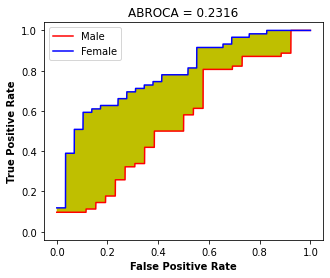

ABROCA: 0.23158541341692884


In [20]:
run_eval('german')

(1485, 7) (2209, 7)
(3694, 7)
[ 0.05043747 -0.06729003  0.06916429  0.02766978 -0.08057166 -0.0320566
  0.00572414]
Equalized odds
{'balanced_accuracy': 0.6116295281363429, 'accuracy': 0.625, 'fairness': 0.6385052822023767, 'TPR_protected': 0.5548780487804879, 'TPR_non_protected': 0.1646090534979424, 'TNR_protected': 0.6877637130801688, 'TNR_non_protected': 0.936}
Statistical parity
{'balanced_accuracy': 0.6116295281363429, 'accuracy': 0.625, 'fairness': -0.3301875414581198, 'Positive_prot_pred': 0.4337474120082816, 'Positive_non_prot_pred': 0.10355987055016182, 'Negative_prot_pred': 0.5662525879917184, 'Negative_non_prot_pred': 0.8964401294498382}


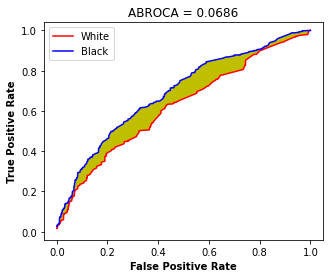

ABROCA: 0.06863696343651127
(1485, 7) (2209, 7)
(1, 2209, 7) (1, 2209, 7)
[[ 0.01356571  0.09521057]
 [ 0.15572442  0.        ]
 [ 0.05751979  0.24717912]
 [ 0.04013149  0.0326469 ]
 [-0.         -0.        ]
 [ 0.          0.        ]
 [ 0.06775151  0.06445308]]
[5. 4.]
(2, 618)
Equalized odds
{'balanced_accuracy': 0.5995209318180017, 'accuracy': 0.6205501618122977, 'fairness': 0.5726076556525975, 'TPR_protected': 0.5253164556962026, 'TPR_non_protected': 0.18930041152263374, 'TNR_protected': 0.6887417218543046, 'TNR_non_protected': 0.9253333333333333}
Statistical parity
{'balanced_accuracy': 0.5995209318180017, 'accuracy': 0.6205501618122977, 'fairness': -0.30097087378640774, 'Positive_prot_pred': 0.42071197411003236, 'Positive_non_prot_pred': 0.11974110032362459, 'Negative_prot_pred': 0.5792880258899676, 'Negative_non_prot_pred': 0.8802588996763754}
(1, 618) (1, 618)


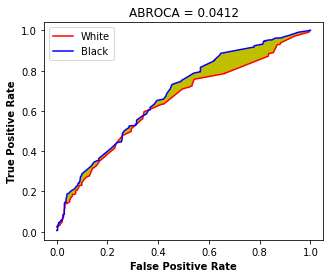

ABROCA: 0.04122001280769747
(1485, 7) (2209, 7)
(1, 2209, 7) (1, 2209, 7)
[[ 0.00133598  0.09895279]
 [ 0.24439372  0.        ]
 [ 0.00888523  0.26392277]
 [ 0.03842233  0.03195719]
 [-0.0372607  -0.        ]
 [-0.          0.        ]
 [ 0.05161575  0.05685448]]
[6. 4.]
(2, 618)
Equalized odds
{'balanced_accuracy': 0.5968375686695222, 'accuracy': 0.6181229773462783, 'fairness': 0.5849533346649433, 'TPR_protected': 0.5253164556962026, 'TPR_non_protected': 0.17695473251028807, 'TNR_protected': 0.6887417218543046, 'TNR_non_protected': 0.9253333333333333}
Statistical parity
{'balanced_accuracy': 0.5968375686695222, 'accuracy': 0.6181229773462783, 'fairness': -0.3058252427184466, 'Positive_prot_pred': 0.42071197411003236, 'Positive_non_prot_pred': 0.11488673139158576, 'Negative_prot_pred': 0.5792880258899676, 'Negative_non_prot_pred': 0.8851132686084142}
(1, 618) (1, 618)


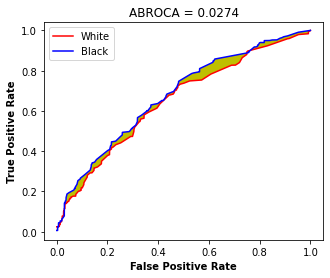

ABROCA: 0.027381174436495414


In [21]:
run_eval('compas-recid')

(7314, 44) (24686, 44)
(32000, 44)
[-1.20748729e-03  9.64825783e-03  4.67293856e-03 -6.27056529e-03
  7.75600655e-03 -1.49947360e-03  1.76644946e-03 -1.36915684e-04
  4.05808940e-04  1.13720237e-03 -7.29921422e-03  1.20529306e-03
  2.88732673e-02 -3.16997769e-05 -3.64911496e-05  7.04530565e-06
 -2.02069764e-03 -6.68753521e-03  6.85483905e-03 -1.66233960e-02
  1.27670771e-02  6.64149270e-03 -9.70217148e-02 -3.05834096e-02
 -4.11079606e-01 -6.87217701e-03 -3.79293360e-03 -4.92646442e-02
 -2.75085845e-02 -2.42629769e-02 -7.92902449e-02 -1.67587267e-01
 -2.87168071e-01 -2.85650005e-02 -2.77555756e-16 -3.60822483e-16
  9.73875736e-04 -5.73448749e-02 -8.96209120e-02 -2.80206642e-01
  0.00000000e+00  0.00000000e+00 -2.65305824e-03  1.42106915e-02]
Equalized odds
{'balanced_accuracy': 0.5036618893939597, 'accuracy': 0.7586584032081662, 'fairness': 0.00700133423305453, 'TPR_protected': 0.009792401096748922, 'TPR_non_protected': 0.01455026455026455, 'TNR_protected': 0.996931385786179, 'TNR_non_p

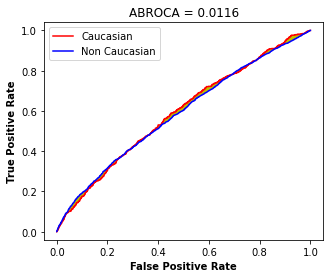

ABROCA: 0.011554001470150819
(7314, 44) (24686, 44)
(1, 24686, 44) (1, 24686, 44)
[[ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.12010019e-02  1.07772091e-02]
 [ 0.00000000e+00 -0.00000000e+00]
 [ 4.03068404e-03  9.33403339e-03]
 [-1.23237973e-04  9.88170881e-05]
 [ 4.28798917e-04  3.85583848e-04]
 [ 4.57529511e-04  4.43507182e-04]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.65314662e-03  1.47947412e-03]
 [-1.32095658e-03 -2.75862170e-03]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.50626287e-02  2.07685127e-02]
 [ 7.69192907e-05  3.44152297e-05]
 [ 7.35065547e-05  6.23888710e-05]
 [ 1.02784550e-04  3.39602429e-05]
 [ 1.19406091e-03  3.76276265e-03]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.000

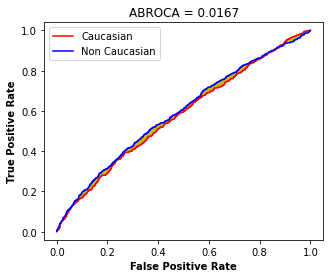

ABROCA: 0.01670520508074152
(7314, 44) (24686, 44)
(1, 24686, 44) (1, 24686, 44)
[[ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.15849481e-02  8.67743052e-03]
 [ 0.00000000e+00 -0.00000000e+00]
 [ 3.91285502e-03  9.60947948e-03]
 [-7.64246660e-04  0.00000000e+00]
 [ 9.58562479e-04  8.66622641e-04]
 [ 3.93609214e-04  3.48549518e-04]
 [ 1.22501189e-03  0.00000000e+00]
 [ 2.38827776e-03  1.07743541e-03]
 [-7.04117240e-04 -6.34730936e-03]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.72671131e-02  2.16614233e-02]
 [ 7.50885228e-05  1.71696380e-05]
 [ 6.62228328e-05  4.88734666e-05]
 [ 1.00003034e-04  2.26779610e-05]
 [ 0.00000000e+00  5.73708970e-03]
 [ 0.00000000e+00  4.04343107e-03]
 [ 0.00000000e+00  6.08184464e-03]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.0000

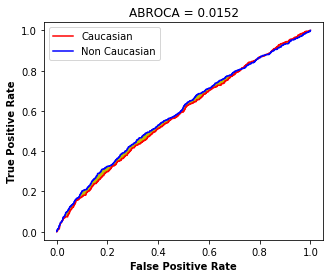

ABROCA: 0.01519760322149386


In [23]:
run_eval('diabetes')

(21166, 11) (21128, 11)
(42294, 11)
[ 1.91174100e-01  3.23888285e-02 -5.45580242e-05  2.14963874e-03
  4.50519841e-02 -5.32095438e-04 -2.79664569e-02  2.06980846e-01
  4.04943805e-02 -3.99782371e-03  9.38646561e-03]
Equalized odds
{'balanced_accuracy': 0.781650655811713, 'accuracy': 0.7847291183934679, 'fairness': 0.21712070060379396, 'TPR_protected': 0.6988150098749177, 'TPR_non_protected': 0.7231235514351935, 'TNR_protected': 0.9173080072048468, 'TNR_non_protected': 0.7244958481613286}
Statistical parity
{'balanced_accuracy': 0.781650655811713, 'accuracy': 0.7847291183934679, 'fairness': 0.2660063657868574, 'Positive_prot_pred': 0.28660470202296334, 'Positive_non_prot_pred': 0.5526110678098207, 'Negative_prot_pred': 0.7133952979770366, 'Negative_non_prot_pred': 0.4473889321901793}


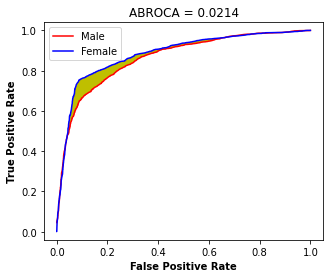

ABROCA: 0.021350421135580073
(21166, 11) (21128, 11)
(1, 21166, 11) (1, 21166, 11)
[[ 0.          0.        ]
 [ 0.03646056  0.02502   ]
 [-0.00259823 -0.00220675]
 [-0.01154244 -0.00733739]
 [-0.          0.        ]
 [-0.         -0.        ]
 [-0.         -0.        ]
 [ 0.18133103  0.22822911]
 [ 0.03896534  0.02977446]
 [-0.00328871 -0.0042289 ]
 [ 0.01304422 -0.00270277]]
[7. 7.]
(2, 8981)
Equalized odds
{'balanced_accuracy': 0.8126177337836265, 'accuracy': 0.8133838102661174, 'fairness': 0.3422007669859808, 'TPR_protected': 0.7222968435191404, 'TPR_non_protected': 0.8338384738812623, 'TNR_protected': 0.9130434782608695, 'TNR_non_protected': 0.6823843416370107}
Statistical parity
{'balanced_accuracy': 0.8126177337836265, 'accuracy': 0.8133838102661174, 'fairness': 0.34272352744683215, 'Positive_prot_pred': 0.2972942879412092, 'Positive_non_prot_pred': 0.6400178153880414, 'Negative_prot_pred': 0.7027057120587907, 'Negative_non_prot_pred': 0.3599821846119586}
(1, 8981) (1, 8981)


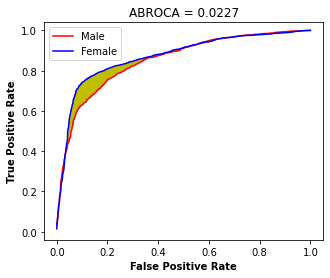

ABROCA: 0.02270663183039775
(21166, 11) (21128, 11)
(1, 21166, 11) (1, 21166, 11)
[[-0.          0.        ]
 [ 0.03002941  0.02234535]
 [-0.00362921 -0.00311705]
 [-0.00827408 -0.00476021]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [-0.          0.        ]
 [ 0.19709491  0.24243061]
 [ 0.05043457  0.04273391]
 [-0.00707946 -0.0097245 ]
 [ 0.01803665 -0.        ]]
[7. 6.]
(2, 8981)
Equalized odds
{'balanced_accuracy': 0.8032832576375141, 'accuracy': 0.8043090969825186, 'fairness': 0.35334897490266426, 'TPR_protected': 0.6917394224311618, 'TPR_non_protected': 0.826707077910501, 'TNR_protected': 0.9052140596368482, 'TNR_non_protected': 0.6868327402135231}
Statistical parity
{'balanced_accuracy': 0.8032832576375141, 'accuracy': 0.8043090969825186, 'fairness': 0.34227814274579665, 'Positive_prot_pred': 0.29161563300300636, 'Positive_non_prot_pred': 0.633893775748803, 'Negative_prot_pred': 0.7083843669969937, 'Negative_non_prot_pred': 0.366106224251197}
(1, 8981) (1, 8981)


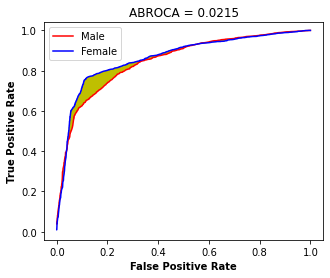

ABROCA: 0.0214588036089531


In [22]:
run_eval('dutch')

(8068, 11) (7025, 11)
(15093, 11)
[ 1.41102671e-03  2.39252367e-02  2.36157783e-08 -4.37477631e-02
  4.08962744e-04 -5.82610580e-02  1.95388791e-02  6.11752413e-02
 -1.31207157e-01  5.02781111e-05 -2.32510893e-02]
Equalized odds
{'balanced_accuracy': 0.5351213375465198, 'accuracy': 0.6865048693770289, 'fairness': 0.016354454000202467, 'TPR_protected': 0.9725355566454145, 'TPR_non_protected': 0.9630584192439863, 'TNR_protected': 0.0989247311827957, 'TNR_non_protected': 0.10580204778156997}
Statistical parity
{'balanced_accuracy': 0.5351213375465198, 'accuracy': 0.6865048693770289, 'fairness': -0.009814752441899666, 'Positive_prot_pred': 0.9498147524418996, 'Positive_non_prot_pred': 0.94, 'Negative_prot_pred': 0.050185247558100374, 'Negative_non_prot_pred': 0.06}


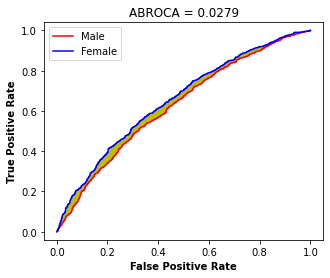

ABROCA: 0.027936584754054725
(8068, 11) (7025, 11)
(1, 8068, 11) (1, 8068, 11)
[[ 2.13480134e-02  3.16689368e-02]
 [ 3.95354882e-02  7.07538971e-02]
 [ 7.36539893e-08  7.26245378e-08]
 [ 2.98790520e-01  0.00000000e+00]
 [ 3.60136874e-03  1.69062923e-02]
 [-2.73876415e-02 -1.55347458e-02]
 [ 2.41056349e-02  3.95045355e-02]
 [ 4.23289770e-02  5.62859375e-02]
 [-1.02726793e-01 -9.02990298e-02]
 [ 7.98554500e-04  2.13912852e-03]
 [-0.00000000e+00  0.00000000e+00]]
[10.  9.]
(2, 2969)
Equalized odds
{'balanced_accuracy': 0.5464312140058016, 'accuracy': 0.6700909397103402, 'fairness': 0.30316250182435944, 'TPR_protected': 0.8391368317802844, 'TPR_non_protected': 0.960446247464503, 'TNR_protected': 0.28817204301075267, 'TNR_non_protected': 0.10631895687061184}
Statistical parity
{'balanced_accuracy': 0.5464312140058016, 'accuracy': 0.6700909397103402, 'fairness': 0.13876726170427744, 'Positive_prot_pred': 0.7992590097675986, 'Positive_non_prot_pred': 0.938026271471876, 'Negative_prot_pred': 0

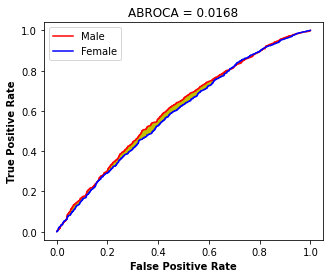

ABROCA: 0.01680900629874924
(8068, 11) (7025, 11)
(1, 8068, 11) (1, 8068, 11)
[[ 1.10726003e-02  3.15259035e-02]
 [ 2.81583055e-02  7.26059092e-02]
 [ 6.08579943e-08  6.82689784e-08]
 [ 4.41867078e-01  0.00000000e+00]
 [ 7.33671150e-04  1.68207740e-02]
 [-3.71260915e-02 -1.68018305e-02]
 [ 2.04850379e-02  3.89953661e-02]
 [ 4.12880920e-02  7.03831752e-02]
 [-1.14940367e-01 -9.82664857e-02]
 [ 4.58248207e-04  2.16375701e-03]
 [-0.00000000e+00  0.00000000e+00]]
[10.  9.]
(2, 2969)
Equalized odds
{'balanced_accuracy': 0.5425520917632194, 'accuracy': 0.6695857190973392, 'fairness': 0.34397983625676953, 'TPR_protected': 0.8386463952918097, 'TPR_non_protected': 0.9726166328600405, 'TNR_protected': 0.289247311827957, 'TNR_non_protected': 0.07923771313941826}
Statistical parity
{'balanced_accuracy': 0.5425520917632194, 'accuracy': 0.6695857190973392, 'fairness': 0.1566183900303132, 'Positive_prot_pred': 0.7985853822835972, 'Positive_non_prot_pred': 0.9552037723139104, 'Negative_prot_pred': 0.2

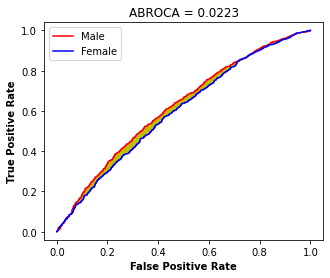

ABROCA: 0.022333726948692234


In [24]:
run_eval('oulad')

(8971, 16) (19031, 16)
(28002, 16)
[ 6.12263602e-04  6.87928593e-04  3.31702669e-02  1.59852274e-02
 -3.16160557e-02  2.42001699e-06 -8.38616217e-02 -3.78143136e-02
 -3.69837055e-02 -5.62287241e-04  4.93606549e-03  4.72510963e-04
 -2.57888263e-03  4.62355657e-04  6.45356043e-03  2.72089611e-02]
Equalized odds
{'balanced_accuracy': 0.545823721493881, 'accuracy': 0.8850191634727546, 'fairness': 0.026938636762158547, 'TPR_protected': 0.09069212410501193, 'TPR_non_protected': 0.11623931623931624, 'TNR_protected': 0.9908781484002723, 'TNR_non_protected': 0.9894867037724181}
Statistical parity
{'balanced_accuracy': 0.545823721493881, 'accuracy': 0.8850191634727546, 'fairness': 0.009442838996166412, 'Positive_prot_pred': 0.016742026151778076, 'Positive_non_prot_pred': 0.026184865147944488, 'Negative_prot_pred': 0.9832579738482219, 'Negative_non_prot_pred': 0.9738151348520555}


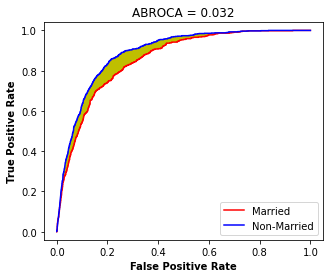

ABROCA: 0.03202610638674308
(8971, 16) (19031, 16)
(1, 19031, 16) (1, 19031, 16)
[[-8.47518453e-04  6.31486700e-04]
 [ 2.36129119e-03  1.19846185e-03]
 [ 0.00000000e+00  0.00000000e+00]
 [ 8.35397283e-03  1.93789012e-03]
 [-0.00000000e+00 -0.00000000e+00]
 [ 4.98943203e-06  3.31433711e-06]
 [-5.01275211e-02 -3.74101126e-02]
 [-0.00000000e+00 -0.00000000e+00]
 [-2.63925412e-02 -2.42602255e-02]
 [ 4.96303746e-04 -1.08697069e-03]
 [ 2.25915955e-03  7.67607176e-04]
 [ 5.38628899e-04  4.47470309e-04]
 [-1.58178588e-03 -1.76583360e-03]
 [ 3.04812145e-04  2.60290321e-04]
 [ 4.29813288e-03  2.37172527e-03]
 [ 3.66170168e-03 -1.18707104e-03]]
[13. 13.]
(2, 3819)
Equalized odds
{'balanced_accuracy': 0.5586713841665017, 'accuracy': 0.8775857554333595, 'fairness': 0.05393608062780994, 'TPR_protected': 0.10025062656641603, 'TPR_non_protected': 0.14871794871794872, 'TNR_protected': 0.9909356725146199, 'TNR_non_protected': 0.9854669140383426}
Statistical parity
{'balanced_accuracy': 0.558671384166501

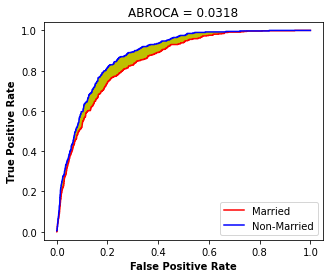

ABROCA: 0.031761303665194
(8971, 16) (19031, 16)
(1, 19031, 16) (1, 19031, 16)
[[-1.73925072e-03  6.91267699e-04]
 [ 1.45374738e-03  1.15728836e-03]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.90138355e-02  0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00]
 [ 4.49722300e-06  3.25855652e-06]
 [-7.16702654e-02 -4.25333403e-02]
 [-0.00000000e+00 -0.00000000e+00]
 [-3.05217818e-02 -2.79439700e-02]
 [ 9.97994151e-05 -1.11575882e-03]
 [ 3.45146115e-03  1.21847870e-03]
 [ 5.32358621e-04  4.48831006e-04]
 [-2.09126268e-03 -2.00597109e-03]
 [ 3.78969545e-04  2.65558842e-04]
 [ 6.93833333e-03  2.33717946e-03]
 [ 1.69528124e-02 -0.00000000e+00]]
[13. 11.]
(2, 3819)
Equalized odds
{'balanced_accuracy': 0.5582383968564664, 'accuracy': 0.8775857554333595, 'fairness': 0.05613313169704151, 'TPR_protected': 0.09774436090225563, 'TPR_non_protected': 0.14871794871794872, 'TNR_protected': 0.9909356725146199, 'TNR_non_protected': 0.9857761286332715}
Statistical parity
{'balanced_accuracy': 0.5582383968564664,

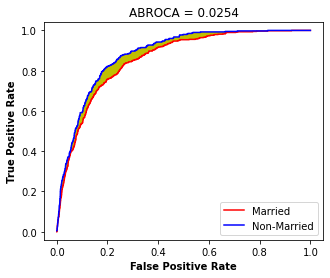

ABROCA: 0.025397418552208322


In [25]:
run_eval('bank')

(21403, 14) (10252, 14)
(31655, 14)
[ 5.01916436e-03 -1.52492600e-02  7.30092733e-08 -2.73292380e-03
  4.70145783e-02 -2.39694940e-02  6.62770858e-04 -1.78918367e-02
  1.50573469e-02  1.06240218e-01  8.88769256e-06  1.12646171e-04
  3.31961596e-03 -8.69738953e-04]
Equalized odds
{'balanced_accuracy': 0.6398751720717246, 'accuracy': 0.802240731185966, 'fairness': 0.3091467840612039, 'TPR_protected': 0.09381237524950099, 'TPR_non_protected': 0.35572572224155935, 'TNR_protected': 0.9918822932521563, 'TNR_non_protected': 0.9446488561830108}
Statistical parity
{'balanced_accuracy': 0.6398751720717246, 'accuracy': 0.802240731185966, 'fairness': 0.13215346061560318, 'Positive_prot_pred': 0.017780778753094757, 'Positive_non_prot_pred': 0.14993423936869793, 'Negative_prot_pred': 0.9822192212469052, 'Negative_non_prot_pred': 0.850065760631302}


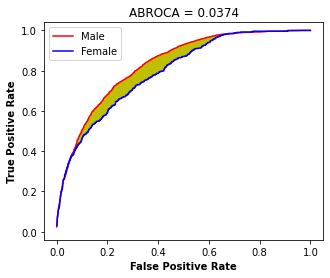

ABROCA: 0.037395344821048546
(21403, 14) (10252, 14)
(1, 21403, 14) (1, 21403, 14)
[[ 3.30758612e-03  1.26676359e-03]
 [-1.84306743e-02 -6.80303985e-03]
 [-3.46688392e-08 -9.53700561e-08]
 [-4.17215714e-03 -4.44510783e-03]
 [ 4.54986998e-02  2.38500613e-02]
 [-2.57798400e-02 -1.38855392e-02]
 [-1.83247586e-04 -1.36917230e-04]
 [-7.29110498e-02  4.06137769e-02]
 [-0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [ 8.72099193e-06  1.47120507e-05]
 [ 1.25031404e-04  1.04183449e-04]
 [ 2.07250650e-03  4.45306301e-04]
 [-4.92228357e-03 -5.28342809e-03]]
[12. 12.]
(2, 4443)
Equalized odds
{'balanced_accuracy': 0.6488948150442606, 'accuracy': 0.8283817240603196, 'fairness': 0.4150612647382571, 'TPR_protected': 0.07984031936127745, 'TPR_non_protected': 0.4195804195804196, 'TNR_protected': 0.9989852866565195, 'TNR_non_protected': 0.9236641221374046}
Statistical parity
{'balanced_accuracy': 0.6488948150442606, 'accuracy': 0.8283817240603196, 'fairness': 0.17690749493585414, 'P

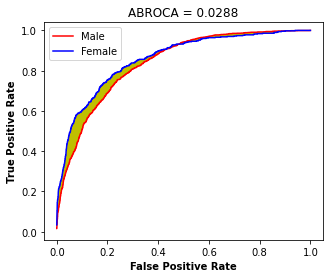

ABROCA: 0.028766653421975576
(21403, 14) (10252, 14)
(1, 21403, 14) (1, 21403, 14)
[[ 3.33760943e-03  1.25539472e-03]
 [-2.50082674e-02 -3.87682333e-03]
 [-2.64185628e-08 -9.49076964e-08]
 [-4.34870347e-03 -4.67868918e-03]
 [ 4.65831439e-02  2.40317496e-02]
 [-2.85884757e-02 -1.38418809e-02]
 [-4.23177308e-04 -2.72148553e-04]
 [-7.40843713e-02  3.98926718e-02]
 [-0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [ 8.66239177e-06  1.47148766e-05]
 [ 1.24332005e-04  1.04692872e-04]
 [ 2.20389914e-03  4.67632408e-04]
 [-4.75042747e-03 -5.37983474e-03]]
[12. 12.]
(2, 4443)
Equalized odds
{'balanced_accuracy': 0.6545773469380918, 'accuracy': 0.8299572361017331, 'fairness': 0.4415852459199987, 'TPR_protected': 0.07584830339321358, 'TPR_non_protected': 0.43846153846153846, 'TNR_protected': 0.9989852866565195, 'TNR_non_protected': 0.9200132758048457}
Statistical parity
{'balanced_accuracy': 0.6545773469380918, 'accuracy': 0.8299572361017331, 'fairness': 0.18591042088678822, '

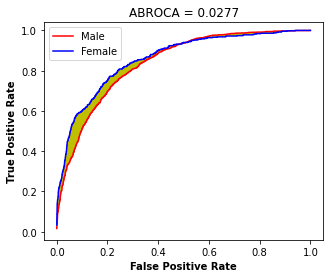

ABROCA: 0.02768201246532854


In [26]:
run_eval('adult-gender')

(95545, 36) (103644, 36)
(199189, 36)
[ 9.08531009e-04  7.58616441e-03  9.41511796e-04 -4.49741246e-03
  1.04564343e-03 -8.43436123e-06  1.39115917e-02 -2.94140575e-03
 -2.07781481e-03  2.22905592e-03  4.42613240e-03 -2.18454138e-03
  6.54740576e-02  7.92071224e-04  9.02210516e-03  3.38487751e-04
  9.14229426e-06  8.79571633e-05  1.55497789e-05 -7.46524247e-03
  1.67117178e-04 -2.56958064e-04 -2.23761635e-03  8.80684761e-03
  4.23886933e-03  9.94755478e-03 -3.27815821e-03 -3.92994040e-05
 -5.34641500e-05  9.19579363e-05 -4.01506370e-04 -5.90321459e-03
 -3.19318854e-02 -4.27130570e-03  2.41747221e-03  7.07849151e-03]
Equalized odds
{'balanced_accuracy': 0.5127682787992125, 'accuracy': 0.9410427917110827, 'fairness': 0.0005038734836072221, 'TPR_protected': 0.026196928635953028, 'TPR_non_protected': 0.02580004961548003, 'TNR_protected': 0.999700170672079, 'TNR_non_protected': 0.9995931762089447}
Statistical parity
{'balanced_accuracy': 0.5127682787992125, 'accuracy': 0.9410427917110827, '

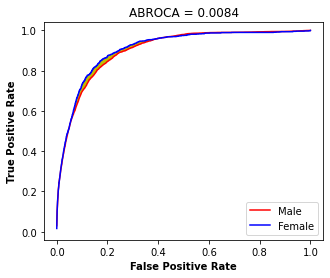

ABROCA: 0.008431911882572014
(95545, 36) (103644, 36)
(1, 103644, 36) (1, 103644, 36)
[[ 9.58913254e-04  1.87944756e-04]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.55270159e-03  8.50628406e-04]
 [-5.84199236e-03 -2.61583742e-03]
 [ 1.39726336e-03  2.01123995e-04]
 [-3.29758752e-06 -1.05160264e-05]
 [ 0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00]
 [-2.86613624e-03 -1.45637930e-03]
 [ 3.69257436e-04  6.81195511e-04]
 [ 0.00000000e+00  0.00000000e+00]
 [-9.49077991e-04 -1.91020299e-04]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 9.21207303e-06  6.96267014e-06]
 [ 9.41789617e-05  4.64559013e-05]
 [ 1.46694297e-05  1.73832967e-05]
 [-1.24809087e-02  3.94028720e-04]
 [ 0.00000000e+00 -0.00000000e+00]
 [ 2.40162471e-04  1.16814397e-05]
 [ 2.52023485e-04 -3.01493266e-06]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -0.00000000e+00]
 [ 9.21293364e-03  2.82667440e-03]
 [-1

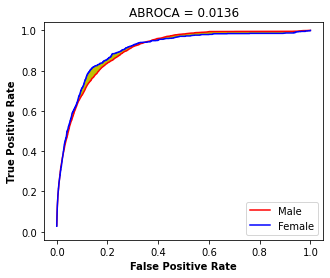

ABROCA: 0.013618739617333614
(95545, 36) (103644, 36)
(1, 103644, 36) (1, 103644, 36)
[[ 1.13693709e-03  1.61431130e-04]
 [ 3.82923998e-03  0.00000000e+00]
 [ 1.60007951e-03  8.58376817e-04]
 [-5.80950208e-03 -2.58135611e-03]
 [ 1.71422989e-03  8.04291647e-06]
 [-3.64937741e-06 -1.02835842e-05]
 [ 0.00000000e+00  0.00000000e+00]
 [-1.26424408e-04 -0.00000000e+00]
 [-3.03879193e-03 -1.48368434e-03]
 [ 2.65429242e-04  1.11291523e-03]
 [ 2.67090713e-04  0.00000000e+00]
 [-2.10517763e-03 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 9.14648055e-06  6.97762240e-06]
 [ 9.35498195e-05  4.67350676e-05]
 [ 1.45846767e-05  1.74245442e-05]
 [-1.57806990e-02  0.00000000e+00]
 [ 0.00000000e+00 -0.00000000e+00]
 [ 3.46123693e-04  0.00000000e+00]
 [ 3.38944515e-04 -0.00000000e+00]
 [ 4.49251661e-04  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.20252613e-02  1.89915553e-03]
 [-8

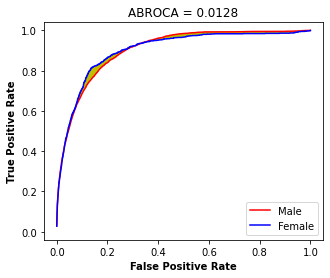

ABROCA: 0.012807425572632893


In [27]:
run_eval("kdd")

(735, 104) (660, 104)
(1395, 104)
[ 6.40552252e-04 -7.37755019e-06 -7.97726142e-04 -1.17227573e+00
 -2.06833547e-02  2.50976165e-01  1.68264608e-01  3.75649111e-02
 -3.36206588e-02  2.19751095e-01 -6.00041981e-02 -1.61221089e-01
 -1.41995849e-01  4.34079916e-01 -2.96275366e-02  6.79564235e-01
  2.13677997e-01 -3.05427300e-02  7.14728099e-02  2.10293118e-01
 -1.27263987e-02 -2.61162781e-02 -7.31772351e-01  1.14603050e-01
 -1.06608893e-01  3.16062762e-02 -9.17617005e-03  1.40199521e-02
  1.63728050e-02 -2.43461827e-01 -3.50359514e-02 -5.92390931e-02
 -4.58208588e-02  1.41509749e-01  1.48079298e-02 -1.95033590e-01
 -3.17624176e-02  1.53943221e-02 -1.53093515e-02 -1.59290574e-01
  1.20614574e-01  3.42815213e-02  2.34772461e-02 -2.55340091e-01
  4.68539842e-02 -1.30198039e-01  1.77945985e-01 -6.42415776e-02
 -2.97875593e-02  1.65785865e-02  4.28390647e-02  4.77402530e-01
 -2.14904406e-01  3.64145557e-01 -6.40493480e-02  1.28318739e-01
 -4.16245007e-02 -6.12753276e-03  2.86820112e-01 -5.0033

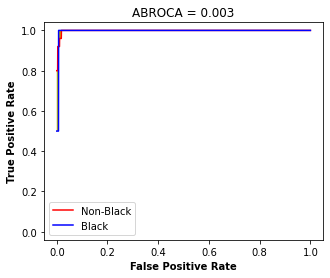

ABROCA: 0.0030445871450032087
(735, 104) (660, 104)
(1, 735, 104) (1, 735, 104)
[[-1.04603291e-03  6.58093229e-05]
 [-3.36268742e-05 -7.14690584e-06]
 [-7.88262846e-03 -1.11797473e-03]
 [-0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00 -0.00000000e+00]
 [-2.68511374e-02 -2.10624483e-04]
 [-0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [-0.00000

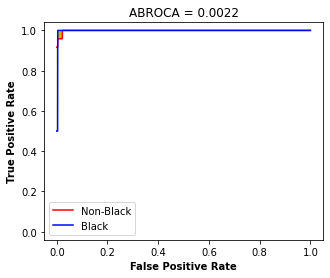

ABROCA: 0.002214114931548385
(735, 104) (660, 104)
(1, 735, 104) (1, 735, 104)
[[-3.40590298e-04  7.68004025e-05]
 [-2.44273721e-05  2.98903845e-06]
 [-5.97797731e-03  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [-3.36153613e-02  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.000000

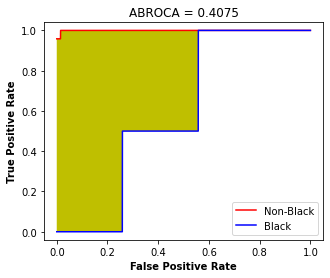

ABROCA: 0.407526169325019


In [28]:
run_eval('crime')

(1017, 7) (1346, 7)
(2363, 7)
[ 0.02042813 -0.05615071  0.07327532  0.02122483  0.01934292 -0.07885845
  0.00959448]
Equalized odds
{'balanced_accuracy': 0.538963686805065, 'accuracy': 0.8431952662721893, 'fairness': 0.1541677357727211, 'TPR_protected': 0.13043478260869565, 'TPR_non_protected': 0.0, 'TNR_protected': 0.973741794310722, 'TNR_non_protected': 0.9974747474747475}
Statistical parity
{'balanced_accuracy': 0.538963686805065, 'accuracy': 0.8431952662721893, 'fairness': -0.044940353763883174, 'Positive_prot_pred': 0.0472027972027972, 'Positive_non_prot_pred': 0.0022624434389140274, 'Negative_prot_pred': 0.9527972027972028, 'Negative_non_prot_pred': 0.997737556561086}


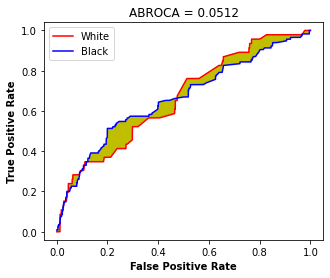

ABROCA: 0.051184998863843895
(1017, 7) (1346, 7)
(1, 1346, 7) (1, 1346, 7)
[[ 0.00322991  0.024409  ]
 [ 0.          0.        ]
 [ 0.05687805  0.10120349]
 [ 0.02321021  0.02509456]
 [ 0.00637572  0.00832043]
 [-0.00835576 -0.01232729]
 [ 0.0319577   0.01966765]]
[6. 6.]
(2, 442)
Equalized odds
{'balanced_accuracy': 0.5111753943529644, 'accuracy': 0.8404977375565611, 'fairness': 0.08198313465366333, 'TPR_protected': 0.056179775280898875, 'TPR_non_protected': 0.0, 'TNR_protected': 0.9716713881019831, 'TNR_non_protected': 0.9974747474747475}
Statistical parity
{'balanced_accuracy': 0.5111753943529644, 'accuracy': 0.8404977375565611, 'fairness': -0.03167420814479638, 'Positive_prot_pred': 0.033936651583710405, 'Positive_non_prot_pred': 0.0022624434389140274, 'Negative_prot_pred': 0.9660633484162896, 'Negative_non_prot_pred': 0.997737556561086}
(1, 442) (1, 442)


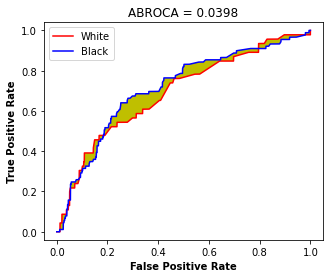

ABROCA: 0.039804648584157123
(1017, 7) (1346, 7)
(1, 1346, 7) (1, 1346, 7)
[[ 0.          0.03150036]
 [ 0.02681427  0.        ]
 [ 0.04138906  0.11768169]
 [ 0.02278281  0.02470599]
 [ 0.00484908  0.02280558]
 [-0.02558092 -0.02485722]
 [ 0.04184143  0.01511916]]
[6. 6.]
(2, 442)
Equalized odds
{'balanced_accuracy': 0.5111753943529644, 'accuracy': 0.8404977375565611, 'fairness': 0.08198313465366333, 'TPR_protected': 0.056179775280898875, 'TPR_non_protected': 0.0, 'TNR_protected': 0.9716713881019831, 'TNR_non_protected': 0.9974747474747475}
Statistical parity
{'balanced_accuracy': 0.5111753943529644, 'accuracy': 0.8404977375565611, 'fairness': -0.03167420814479638, 'Positive_prot_pred': 0.033936651583710405, 'Positive_non_prot_pred': 0.0022624434389140274, 'Negative_prot_pred': 0.9660633484162896, 'Negative_non_prot_pred': 0.997737556561086}
(1, 442) (1, 442)


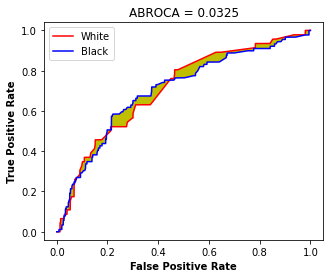

ABROCA: 0.032470038875862646


In [29]:
run_eval('compas-viol')

(8276, 23) (12724, 23)
(21000, 23)
[-9.67904402e-08  1.48427805e-02 -1.44673573e-02 -2.31376144e-02
  1.56658714e-03  9.55572951e-02  2.14931741e-02  1.30859053e-02
  4.63833523e-03  1.26528487e-03  3.57568393e-03 -6.62032410e-07
  2.43461552e-07  7.55921322e-08 -1.40083896e-07 -1.30716937e-07
  1.45247380e-07 -6.45112531e-07 -1.86038144e-07  7.07415160e-08
 -7.87683654e-08 -3.40771544e-07 -1.48786566e-07]
Equalized odds
{'balanced_accuracy': 0.561756435528757, 'accuracy': 0.7987777777777778, 'fairness': 0.014165199190716515, 'TPR_protected': 0.13811659192825113, 'TPR_non_protected': 0.1467455621301775, 'TNR_protected': 0.9838520945471566, 'TNR_non_protected': 0.9783158655583665}
Statistical parity
{'balanced_accuracy': 0.561756435528757, 'accuracy': 0.7987777777777778, 'fairness': 0.009184924293434163, 'Positive_prot_pred': 0.04120267260579064, 'Positive_non_prot_pred': 0.050387596899224806, 'Negative_prot_pred': 0.9587973273942093, 'Negative_non_prot_pred': 0.9496124031007752}


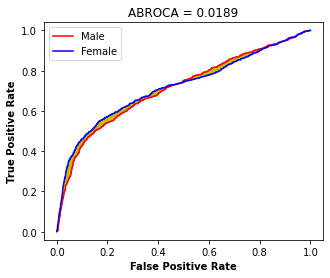

ABROCA: 0.01885269915390655
(8276, 23) (12724, 23)
(1, 12724, 23) (1, 12724, 23)
[[-2.14987138e-08  1.61052594e-08]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.65555205e-03  2.77472795e-03]
 [ 2.82059627e-02  3.28509345e-02]
 [ 5.92155507e-03  5.31510125e-03]
 [ 9.83483468e-02  9.32214937e-02]
 [ 1.52303813e-02  2.10950108e-02]
 [ 2.17091549e-02  1.21131112e-02]
 [ 3.19842188e-03  3.75019488e-03]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [-5.89322774e-07 -7.32258504e-07]
 [ 1.58431044e-07  3.80593510e-07]
 [ 1.86241642e-07 -3.75121948e-07]
 [-1.44249467e-07  3.81939546e-07]
 [-5.23203114e-07 -7.09803791e-08]
 [ 5.83444402e-07  4.34789869e-08]
 [-8.10434584e-07 -8.98648685e-07]
 [-7.65245712e-07 -3.05000458e-07]
 [ 2.86179579e-07 -6.28825943e-07]
 [ 2.25960868e-08 -2.09138921e-07]
 [-8.91747322e-07  9.95412597e-08]
 [-1.53114130e-07  8.23740896e-09]]
[20. 20.]
(2, 3612)
Equalized odds
{'balanced_accuracy': 0.5501404327834604, 'accuracy': 0.790282392026578, 'fair

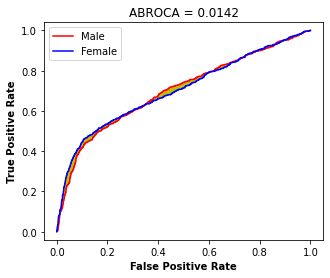

ABROCA: 0.014226686864266088
(8276, 23) (12724, 23)
(1, 12724, 23) (1, 12724, 23)
[[-4.71112524e-08  6.97993570e-09]
 [ 8.69727974e-02  0.00000000e+00]
 [ 0.00000000e+00  1.29944152e-03]
 [ 6.15438527e-03  3.52514943e-02]
 [ 4.86742226e-03  5.44383421e-03]
 [ 1.00159357e-01  9.31530174e-02]
 [ 9.13494764e-03  2.75055981e-02]
 [ 2.86546379e-02  2.98775024e-03]
 [ 0.00000000e+00  1.00333894e-02]
 [ 3.66512876e-03  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [-5.48839651e-07 -7.83404512e-07]
 [ 1.25281990e-07  4.47841094e-07]
 [ 1.33180240e-07 -3.88838384e-07]
 [-1.08379617e-07  3.60852559e-07]
 [-4.84647551e-07 -6.88430516e-08]
 [ 5.26980312e-07  2.30218778e-08]
 [-8.28296003e-07 -8.99385250e-07]
 [-7.30766412e-07 -3.06306746e-07]
 [ 2.39884670e-07 -5.94519433e-07]
 [ 3.18418091e-08 -2.09769690e-07]
 [-8.53706262e-07  1.15139230e-07]
 [-1.52487525e-07  1.16745400e-08]]
[20. 20.]
(2, 3612)
Equalized odds
{'balanced_accuracy': 0.5566058035779715, 'accuracy': 0.7930509413067552, 'fa

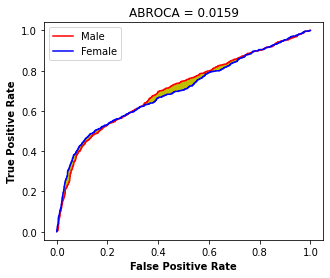

ABROCA: 0.015878584271428214


In [30]:
run_eval('credit')

(12221, 11) (2337, 11)
(14558, 11)
[ 0.00851713 -0.00503894  0.00870222  0.03640991 -0.02793263  0.10750915
 -0.05662852  0.00499534  0.01306143  0.01058748  0.0781727 ]
Equalized odds
{'balanced_accuracy': 0.3885458807753502, 'accuracy': 0.6629807692307692, 'fairness': 0.3505832170764728, 'TPR_protected': 0.9676511954992968, 'TPR_non_protected': 0.7049011532125206, 'TNR_protected': 0.09266409266409266, 'TNR_non_protected': 0.004830917874396135}
Statistical parity
{'balanced_accuracy': 0.3885458807753502, 'accuracy': 0.6629807692307692, 'fairness': -0.22555018681899097, 'Positive_prot_pred': 0.9515463917525773, 'Positive_non_prot_pred': 0.7259962049335863, 'Negative_prot_pred': 0.04845360824742268, 'Negative_non_prot_pred': 0.27400379506641365}


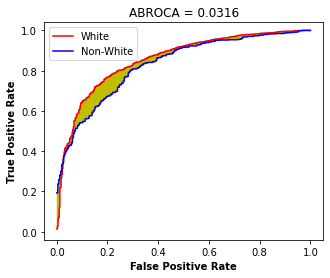

ABROCA: 0.03157923312855557
(12221, 11) (2337, 11)
(1, 12221, 11) (1, 12221, 11)
[[ 4.52656545e-03  4.73418189e-03]
 [ 2.66170250e-02  4.39560701e-02]
 [ 1.88675264e-02  1.57648958e-02]
 [ 0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -0.00000000e+00]
 [ 1.61232630e-03 -1.21000924e-05]
 [ 0.00000000e+00 -0.00000000e+00]
 [ 1.68031202e-03  6.98018055e-03]
 [ 0.00000000e+00  0.00000000e+00]]
[5. 5.]
(2, 970)
Equalized odds
{'balanced_accuracy': 0.6027571507150715, 'accuracy': 0.8561855670103092, 'fairness': 0.2774757230453433, 'TPR_protected': 0.9620253164556962, 'TPR_non_protected': 1.0, 'TNR_protected': 0.2702702702702703, 'TNR_non_protected': 0.03076923076923077}
Statistical parity
{'balanced_accuracy': 0.6027571507150715, 'accuracy': 0.8561855670103092, 'fairness': 0.09793814432989689, 'Positive_prot_pred': 0.9, 'Positive_non_prot_pred': 0.9979381443298969, 'Negative_prot_pred': 0.1, 'Negative_non_prot_pred': 0

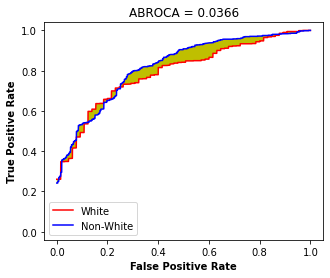

ABROCA: 0.03659783451694428
(12221, 11) (2337, 11)
(1, 12221, 11) (1, 12221, 11)
[[ 0.00804052  0.00491631]
 [ 0.02182993  0.03087752]
 [ 0.01491673  0.01639596]
 [ 0.0359775   0.        ]
 [-0.          0.        ]
 [-0.          0.04512196]
 [ 0.         -0.        ]
 [ 0.01525985  0.        ]
 [ 0.          0.        ]
 [ 0.          0.0211146 ]
 [ 0.          0.        ]]
[5. 5.]
(2, 970)
Equalized odds
{'balanced_accuracy': 0.6419485698569858, 'accuracy': 0.865979381443299, 'fairness': 0.4122202046252679, 'TPR_protected': 0.9507735583684951, 'TPR_non_protected': 1.0, 'TNR_protected': 0.3783783783783784, 'TNR_non_protected': 0.015384615384615385}
Statistical parity
{'balanced_accuracy': 0.6419485698569858, 'accuracy': 0.865979381443299, 'fairness': 0.13608247422680408, 'Positive_prot_pred': 0.8628865979381444, 'Positive_non_prot_pred': 0.9989690721649485, 'Negative_prot_pred': 0.13711340206185568, 'Negative_non_prot_pred': 0.0010309278350515464}
(1, 970) (1, 970)


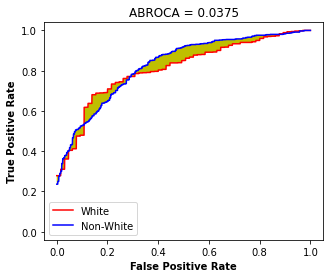

ABROCA: 0.03749216481542564


In [31]:
run_eval('law')

(47, 5) (35, 5)
(82, 5)
[-8.65685523e-03  1.94235001e+12  2.91352502e+12 -4.65869904e-02
 -4.85587503e+12]
Equalized odds
{'balanced_accuracy': 0.8055555555555556, 'accuracy': 0.8055555555555556, 'fairness': 0.6388888888888888, 'TPR_protected': 1.0, 'TPR_non_protected': 0.5833333333333334, 'TNR_protected': 1.0, 'TNR_non_protected': 0.7777777777777778}
Statistical parity
{'balanced_accuracy': 0.8055555555555556, 'accuracy': 0.8055555555555556, 'fairness': 0.028571428571428525, 'Positive_prot_pred': 0.4, 'Positive_non_prot_pred': 0.42857142857142855, 'Negative_prot_pred': 0.6, 'Negative_non_prot_pred': 0.5714285714285714}


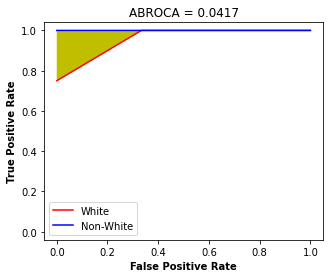

ABROCA: 0.04166666666666666
(47, 5) (35, 5)
(1, 47, 5) (1, 47, 5)
[[-8.23728736e-02 -1.13849009e-01]
 [ 8.37658719e-03  1.81931956e-03]
 [-3.60363865e-03  3.13025952e-03]
 [-1.80334673e+00  0.00000000e+00]
 [ 2.98152479e-02  8.39343091e-04]]
[5. 4.]
(2, 15)
Equalized odds
{'balanced_accuracy': 0.8125, 'accuracy': 0.8, 'fairness': 1.0, 'TPR_protected': 0.0, 'TPR_non_protected': 1.0, 'TNR_protected': 1.0, 'TNR_non_protected': 1.0}
Statistical parity
{'balanced_accuracy': 0.8125, 'accuracy': 0.8, 'fairness': 0.6666666666666666, 'Positive_prot_pred': 0.0, 'Positive_non_prot_pred': 0.6666666666666666, 'Negative_prot_pred': 1.0, 'Negative_non_prot_pred': 0.3333333333333333}
(1, 15) (1, 15)


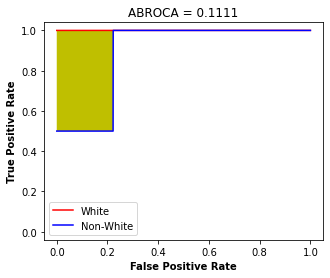

ABROCA: 0.11108610856957006
(47, 5) (35, 5)
(1, 47, 5) (1, 47, 5)
[[-8.21630723e-02 -1.30587893e-01]
 [-5.39474292e-04  2.20030377e-03]
 [-1.75132187e-02  4.17106302e-03]
 [-2.32852679e+00  0.00000000e+00]
 [ 5.97653479e-02 -4.27151378e-04]]
[5. 4.]
(2, 15)
Equalized odds
{'balanced_accuracy': 0.75, 'accuracy': 0.7333333333333333, 'fairness': 0.8, 'TPR_protected': 0.0, 'TPR_non_protected': 0.8, 'TNR_protected': 1.0, 'TNR_non_protected': 1.0}
Statistical parity
{'balanced_accuracy': 0.75, 'accuracy': 0.7333333333333333, 'fairness': 0.5333333333333333, 'Positive_prot_pred': 0.0, 'Positive_non_prot_pred': 0.5333333333333333, 'Negative_prot_pred': 1.0, 'Negative_non_prot_pred': 0.4666666666666667}
(1, 15) (1, 15)


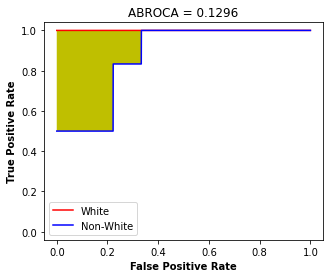

ABROCA: 0.12960462674990436


In [32]:
run_eval('ricci')

(126, 32) (150, 32)
(276, 32)
[-0.02579862 -0.00568843 -0.02984354 -0.04178633 -0.0561039  -0.04022358
 -0.01366501  0.00363585 -0.00583179 -0.01696874  0.01364584  0.01681914
  0.05579436 -0.03486849 -0.04609181  0.01271491 -0.05124529  0.04910451
 -0.03473757 -0.04420709  0.07172314 -0.02541702  0.02407039  0.04029327
  0.01132295 -0.02930354 -0.03474613  0.02476119 -0.00129869 -0.00341887
  0.02731098  0.06513284]
Equalized odds
{'balanced_accuracy': 0.7103930911256701, 'accuracy': 0.6890756302521008, 'fairness': 0.17031826879025513, 'TPR_protected': 0.6774193548387096, 'TPR_non_protected': 0.5714285714285714, 'TNR_protected': 0.7777777777777778, 'TNR_non_protected': 0.8421052631578947}
Statistical parity
{'balanced_accuracy': 0.7103930911256701, 'accuracy': 0.6890756302521008, 'fairness': -0.02289429055963821, 'Positive_prot_pred': 0.46551724137931033, 'Positive_non_prot_pred': 0.4426229508196721, 'Negative_prot_pred': 0.5344827586206896, 'Negative_non_prot_pred': 0.557377049180327

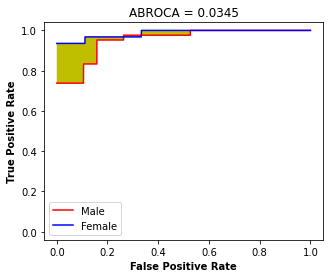

ABROCA: 0.034464803320983596
(126, 32) (150, 32)
(1, 150, 32) (1, 150, 32)
[[-0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [-1.79574413e-02 -2.13242290e-02]
 [ 0.00000000e+00 -0.00000000e+00]
 [-3.69378038e-03 -1.86883373e-02]
 [ 5.49359111e-03 -8.10772029e-02]
 [ 4.71252682e-03 -1.38073983e-02]
 [ 7.34903272e-06 -7.31074418e-03]
 [-1.95262763e-02 -1.51259536e-03]
 [-6.81016491e-03 -3.04430884e-03]
 [-1.02946675e-03  1.58729821e-02]
 [-3.27240400e-02  7.45325629e-02]
 [ 3.30235271e-02  4.22887517e-02]
 [-1.88607829e-02 -1.09742293e-03]
 [-4.81146676e-02 -6.12414979e-02]
 [-0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00]
 [ 1.22071765e-03  2.60677726e-02]
 [-9.96868880e-03  5.63093276e-04]
 [-2.97072318e-03 -1.00228370e-03]
 [ 0.00000000e+00 -0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [ 3.03926910e-02  3.07651977e-02]
 [ 1.34566768e-02 -6.81647458e-03]
 [-4.34463945e-03 -1.58642793e-02]
 [-2.43719453e-

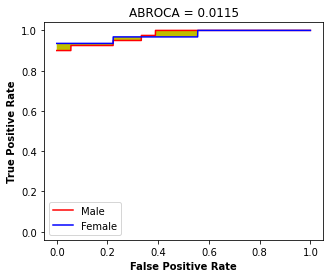

ABROCA: 0.011467233815020256
(126, 32) (150, 32)
(1, 150, 32) (1, 150, 32)
[[-0.          0.        ]
 [ 0.          0.        ]
 [-0.01610758 -0.01935123]
 [ 0.         -0.01336749]
 [-0.         -0.04779335]
 [ 0.         -0.15441116]
 [ 0.00568339 -0.01618428]
 [ 0.         -0.01071593]
 [-0.02135891 -0.        ]
 [-0.01065044 -0.        ]
 [ 0.          0.0191879 ]
 [-0.03810851  0.08943803]
 [ 0.03845977  0.04953564]
 [-0.02809086 -0.        ]
 [-0.05863574 -0.07217153]
 [-0.01558123  0.01436586]
 [-0.01901397 -0.        ]
 [ 0.          0.04514592]
 [-0.0392489   0.        ]
 [-0.03585038 -0.        ]
 [ 0.02016444  0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.03306286  0.0364706 ]
 [ 0.02026759 -0.00100321]
 [-0.         -0.02418192]
 [-0.03711519  0.00148719]
 [ 0.00699168  0.01936913]
 [-0.00556446  0.01296607]
 [-0.00510664 -0.00139701]
 [ 0.03222822  0.00234593]
 [ 0.06028784  0.08701997]]
[21. 21.]
(2, 58)
Equalized odds
{'balanced_accuracy': 0.838

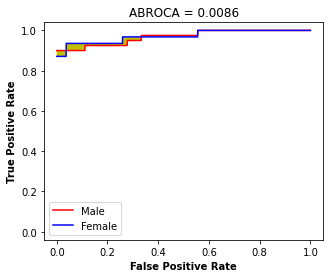

ABROCA: 0.008642264439431105


In [33]:
run_eval('student-mat')

(192, 32) (262, 32)
(454, 32)
[-0.12734847 -0.00916696  0.01889829  0.00420345  0.02898278 -0.00376674
 -0.01756514  0.00892616  0.00590424 -0.03989334 -0.00805691 -0.02305943
  0.03932734 -0.01306704 -0.08239232  0.07148206  0.00495534 -0.02058332
  0.01377722 -0.05384314  0.05160603  0.00753552 -0.00607788 -0.00445628
 -0.01933214  0.00547717 -0.00453106 -0.00142413  0.00437171 -0.00185338
  0.03238794  0.04054432]
Equalized odds
{'balanced_accuracy': 0.5502958579881657, 'accuracy': 0.6153846153846154, 'fairness': 0.4240498034076016, 'TPR_protected': 0.5688073394495413, 'TPR_non_protected': 0.7666666666666667, 'TNR_protected': 0.5833333333333334, 'TNR_non_protected': 0.35714285714285715}
Statistical parity
{'balanced_accuracy': 0.5502958579881657, 'accuracy': 0.6153846153846154, 'fairness': 0.18952423497878035, 'Positive_prot_pred': 0.5537190082644629, 'Positive_non_prot_pred': 0.7432432432432432, 'Negative_prot_pred': 0.4462809917355372, 'Negative_non_prot_pred': 0.25675675675675674

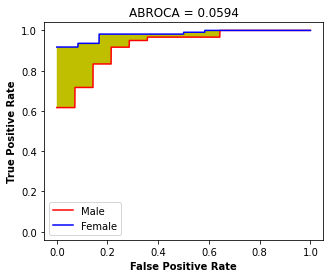

ABROCA: 0.059433392907558856
(192, 32) (262, 32)
(1, 262, 32) (1, 262, 32)
[[-6.76495056e-02 -6.80340587e-02]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.28969181e-02 -1.56467354e-03]
 [ 1.28330391e-03  1.43586557e-02]
 [ 3.12383503e-02 -4.83770970e-03]
 [ 0.00000000e+00 -0.00000000e+00]
 [-5.33571273e-03 -1.39149600e-02]
 [-5.36487211e-03  1.72666963e-03]
 [ 0.00000000e+00  0.00000000e+00]
 [-2.99779238e-02 -1.27955104e-02]
 [-1.84554639e-03 -7.16187507e-03]
 [ 0.00000000e+00 -0.00000000e+00]
 [ 1.81322902e-02  4.55018979e-03]
 [-0.00000000e+00 -0.00000000e+00]
 [-5.45570010e-02 -2.34247879e-02]
 [-2.34335079e-02  8.85827508e-02]
 [ 3.21920848e-02 -1.21232477e-02]
 [-0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [-2.52541823e-03 -7.79321475e-03]
 [ 4.46935141e-02 -2.81667562e-02]
 [-0.00000000e+00  0.00000000e+00]
 [-1.13013621e-02  2.67260135e-03]
 [-2.14132442e-02 -6.23551371e-04]
 [-3.05791603e-02 -1.24342523e-02]
 [-1.90827148e-02  2.51655714e-02]
 [-0.00000000e+

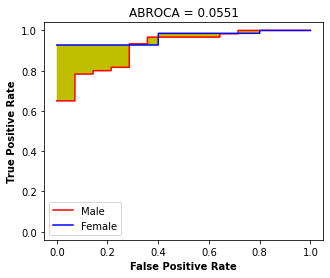

ABROCA: 0.05511077140450311
(192, 32) (262, 32)
(1, 262, 32) (1, 262, 32)
[[-8.94506190e-02 -6.46617775e-02]
 [ 0.00000000e+00  0.00000000e+00]
 [ 1.77319522e-02 -1.69410232e-03]
 [ 0.00000000e+00  3.99952372e-02]
 [ 5.14950450e-02 -0.00000000e+00]
 [ 0.00000000e+00 -0.00000000e+00]
 [-2.43349267e-04 -1.94452966e-02]
 [-1.90844775e-02  2.68003738e-03]
 [ 0.00000000e+00 -0.00000000e+00]
 [-3.50814967e-02 -1.16758630e-02]
 [-2.84381877e-03 -1.11035003e-02]
 [ 0.00000000e+00 -0.00000000e+00]
 [ 2.42528108e-02  2.23611403e-03]
 [-6.57374198e-03 -0.00000000e+00]
 [-6.75268029e-02 -1.51149115e-02]
 [-0.00000000e+00  1.45001481e-01]
 [ 6.21366566e-02 -5.35633301e-03]
 [-0.00000000e+00 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00 -4.86098591e-02]
 [ 7.04048375e-02 -3.76498770e-02]
 [-0.00000000e+00  0.00000000e+00]
 [-3.81564890e-02  0.00000000e+00]
 [-2.98445707e-02 -0.00000000e+00]
 [-3.42866684e-02 -1.17777671e-02]
 [-1.93056605e-02  2.72855012e-02]
 [-0.00000000e+0

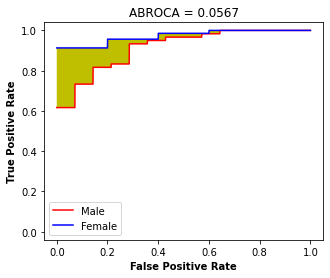

ABROCA: 0.05674990958539203


In [34]:
run_eval('student-por')

(21747, 14) (10347, 14)
(32094, 14)
[-2.54651622e-03 -1.19542641e-03 -1.62275995e-06 -1.34721158e-06
  4.62085261e-03 -1.15634720e-03 -2.73784599e-03  8.20058238e-03
  6.85224648e-03 -1.07045777e-03  1.83659667e-03 -5.07553079e-04
  1.45364007e-05  1.62665386e-03]
Equalized odds
{'balanced_accuracy': 0.8079137498647698, 'accuracy': 0.9056343147946201, 'fairness': 0.060739631893881096, 'TPR_protected': 0.6680080482897385, 'TPR_non_protected': 0.6083304165208261, 'TNR_protected': 0.9980004998750313, 'TNR_non_protected': 0.9990625}
Statistical parity
{'balanced_accuracy': 0.8079137498647698, 'accuracy': 0.9056343147946201, 'fairness': 0.11280881837080209, 'Positive_prot_pred': 0.0755891507336594, 'Positive_non_prot_pred': 0.1883979691044615, 'Negative_prot_pred': 0.9244108492663407, 'Negative_non_prot_pred': 0.8116020308955385}


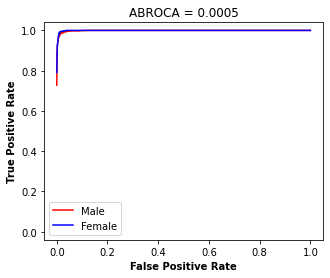

ABROCA: 0.0005308693569049392
(21747, 14) (10347, 14)
(1, 21747, 14) (1, 21747, 14)
[[-2.66045154e-03 -3.02268351e-03]
 [-1.66347381e-03 -1.29229417e-03]
 [-1.71320541e-06  1.38517800e-07]
 [-9.51067943e-06  1.08593515e-05]
 [-0.00000000e+00  0.00000000e+00]
 [-1.09318856e-03 -9.54121872e-04]
 [-2.93149794e-03 -2.99689743e-03]
 [ 3.92636778e-04  7.03511152e-04]
 [ 3.83799080e-03  4.56235082e-03]
 [-0.00000000e+00  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [-1.74725594e-03 -3.24414869e-04]
 [ 1.49440850e-05  1.25786787e-05]
 [ 4.67055452e-04  1.65879757e-03]]
[11. 11.]
(2, 4498)
Equalized odds
{'balanced_accuracy': 0.9291915054405386, 'accuracy': 0.9695420186749667, 'fairness': 0.10103312949478771, 'TPR_protected': 0.7847082494969819, 'TPR_non_protected': 0.8852691218130312, 'TNR_protected': 0.9995001249687578, 'TNR_non_protected': 0.9990278677900194}
Statistical parity
{'balanced_accuracy': 0.9291915054405386, 'accuracy': 0.9695420186749667, 'fairness': 0.19141840818141398, '

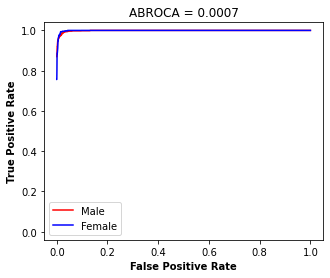

ABROCA: 0.0006774796056383136
(21747, 14) (10347, 14)
(1, 21747, 14) (1, 21747, 14)
[[-2.59010276e-03 -3.03545967e-03]
 [-1.58757503e-03 -1.31227789e-03]
 [-1.74126030e-06  1.33078540e-07]
 [-9.74385516e-06  1.08924910e-05]
 [-0.00000000e+00  0.00000000e+00]
 [-1.28944417e-03 -1.08374806e-03]
 [-2.95789227e-03 -3.60558724e-03]
 [ 5.23896812e-05  2.15996563e-03]
 [ 6.44818071e-03  6.23965302e-03]
 [-2.42285865e-03  0.00000000e+00]
 [-0.00000000e+00  0.00000000e+00]
 [-1.65447746e-03 -3.83784917e-04]
 [ 1.49892526e-05  1.26022272e-05]
 [ 2.91747114e-04  1.97889103e-03]]
[12. 11.]
(2, 4498)
Equalized odds
{'balanced_accuracy': 0.9289295882063847, 'accuracy': 0.9694308581591818, 'fairness': 0.10304520192939537, 'TPR_protected': 0.7826961770623743, 'TPR_non_protected': 0.8852691218130312, 'TNR_protected': 0.9995001249687578, 'TNR_non_protected': 0.9990278677900194}
Statistical parity
{'balanced_accuracy': 0.9289295882063847, 'accuracy': 0.9694308581591818, 'fairness': 0.19164072921298356, '

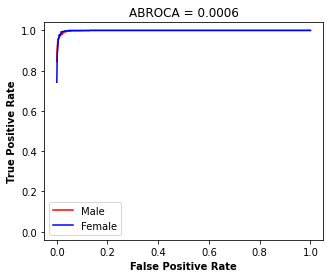

ABROCA: 0.0006290979536896906


In [35]:
run_eval('adult-reconstruction')

In [75]:

X = np.array([[3., 1.], [2., 0.], [0., 2.], [-1., 3.]])
print(X.shape)
# and target y (n_tasks, n_samples)
y = np.array([-3., 1., 1., -2.])
print(y.shape)
model = Lasso(alpha=1.0)
model.fit(X,y)

(4, 2)
(4,)


Lasso()

In [12]:
import numpy as np
from mutar import GroupLasso
from mutar import IndRewLasso
from mutar import IndRewLogistic
# create some X (n_tasks, n_samples, n_features)
X = np.array([[[3, 1], [2, 0], [1, 0]],[[0, 2], [-1, 3], [1, -2]]], dtype=float)
#coef = np.array([[1., 1.], [0., -1]])
y = np.array([[0, 1, 1.0],[ 0,1, 0]])
print(X)
print(y)
alpha = [0.1, 0.1]
relasso = IndRewLasso(alpha=alpha).fit(X, y)

print('lasso:',relasso.coef_)

relogistic = IndRewLogistic(alpha=alpha)
print('logistic:',relogistic.coef_)
# and target y (n_tasks, n_samples)
#y = np.array([[-3., 1.], [1., -2.],[1., -2.]])
#X=1/(1+np.exp(X))
#print(y.shape)

#gl = GroupLasso(alpha=1.)
#coef = gl.fit(X, y).coef_
#print(coef.shape)

# coefficients (n_features, n_tasks)
# share the same support


[[[ 3.  1.]
  [ 2.  0.]
  [ 1.  0.]]

 [[ 0.  2.]
  [-1.  3.]
  [ 1. -2.]]]
[[0. 1. 1.]
 [0. 1. 0.]]
lasso: [[ 0.4776577  -0.        ]
 [-1.30148418  0.15398506]]
logistic: [[0. 0.]
 [0. 0.]]


In [2]:
def load_diabetes_group():
    df = pd.read_csv('data/diabetes-clean.csv')    
    protected_attribute = 'race'
    majority_group_name = 'Caucasian'
    minority_group_name_1 = 'AfricanAmerican'
    minority_group_name_2 = 'Asian'
    minority_group_name_3 = 'Hispanic'
    minority_group_name_4 = 'Other'
    class_label = 'default payment'
    filename = "diabetes.abroca.pdf"
    #df['y'] = [1 if v == 'yes' else 0 for v in df['y']]
    df['readmitted'] = [1 if v == '<30' else 0 for v in df['readmitted']]    
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 2 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name_1,minority_group_name_2,minority_group_name_3,minority_group_name_4


In [3]:
def run_experiment_diabetes_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name_1,minority_group_name_2,minority_group_name_3,minority_group_name_4):    
      
    #Run Logistic Regression model
    LR = LogisticRegression(random_state=0)
    coef=LR.fit(X_train,y_train).coef_
    y_predicts = LR.predict(X_test)
    y_pred_probs = LR.predict_proba(X_test)
    print(coef)    
    #Print measures
    print("Equalized odds")
    print(calculate_performance(X_test.values, y_test.values, y_predicts, y_pred_probs, sa_index, p_Group))
    
    #
    print("Statistical parity")
    print(calculate_performance_SP(X_test.values, y_test.values, y_predicts, sa_index, p_Group))
    
    #make predictions
    X_test['pred_proba'] = LR.predict_proba(X_test)[:,1:2]
    X_test['true_label'] = y_test
    df_test = X_test
    
    #Compute Abroca
    slice,prot_attr_values = compute_abroca_diabetes(df_test, pred_col = 'pred_proba' , label_col = 'true_label', protected_attr_col = protected_attribute,
                           majority_protected_attr_val = 1, n_grid = 10000,
                           plot_slices = True, majority_group_name=majority_group_name,minority_group_name_1=minority_group_name_1,minority_group_name_2=minority_group_name_2,minority_group_name_3=minority_group_name_3,minority_group_name_4=minority_group_name_4,file_name = filename)
    print("ABROCA:",slice)
    print(prot_attr_values)

In [2]:
def run_eval_diabetes(dataset):
    if dataset == 'diabetes':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name_1,minority_group_name_2,minority_group_name_3,minority_group_name_4 = load_diabetes_group()
        print(X_test.shape)
        run_experiment_diabetes_group(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name_1,minority_group_name_2,minority_group_name_3,minority_group_name_4)